In [ ]:
#Checando a versão Java instalada
!java -version
!!pip install --upgrade gdown

openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


['Requirement already satisfied: gdown in /usr/local/lib/python3.10/dist-packages (4.7.3)',
 'Collecting gdown',
 '  Downloading gdown-5.1.0-py3-none-any.whl (17 kB)',
 'Requirement already satisfied: beautifulsoup4 in /usr/local/lib/python3.10/dist-packages (from gdown) (4.12.3)',
 'Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from gdown) (3.13.1)',
 'Requirement already satisfied: requests[socks] in /usr/local/lib/python3.10/dist-packages (from gdown) (2.31.0)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from gdown) (4.66.2)',
 'Requirement already satisfied: soupsieve>1.2 in /usr/local/lib/python3.10/dist-packages (from beautifulsoup4->gdown) (2.5)',
 'Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (3.3.2)',
 'Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) 

In [ ]:
#Instalando Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# -q, quiet level 2: no output except for errors
#> /dev/null on the end of any command where you want to redirect all the stdout into nothingness

In [ ]:
#Mudando a versão do Java para usar como padrão
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
#Mudando a versão do javac para usar como padrão
!update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/javac to provide /usr/bin/javac (javac) in manual mode


In [ ]:
#Mudando a versão do jps para usar como padrão
!update-alternatives --set jps /usr/lib/jvm/java-8-openjdk-amd64/bin/jps

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jps to provide /usr/bin/jps (jps) in manual mode


In [ ]:
#Checando a versão de Java padrão
!java -version

openjdk version "1.8.0_392"
OpenJDK Runtime Environment (build 1.8.0_392-8u392-ga-1~22.04-b08)
OpenJDK 64-Bit Server VM (build 25.392-b08, mixed mode)


In [ ]:
#Encontrando o caminho Java padrão
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-8-openjdk-amd64/jre/


In [ ]:
#importando o módeulo OS
import os
#Criando as variáveis de ambiente
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"
os.environ["PATH"] += ":$JAVA_HOME/bin:$JRE_HOME/bin:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

In [ ]:
#Instala o pacote
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
#Importa as bibliotecas
import os
from datetime import datetime
import time
import json
from json import loads
from csv import DictReader
from kafka import KafkaProducer
from kafka import KafkaConsumer
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Baixar e descompactar o Kafka (5 minutos)
!curl -sSOL https://archive.apache.org/dist/kafka/3.4.0/kafka_2.13-3.4.0.tgz
!tar -xzf kafka_2.13-3.4.0.tgz
#Remover o arquivo compactado
!rm kafka_2.13-3.4.0.tgz

O local padrão de instalação do kafka é:

*   /usr/local

In [ ]:
#Copiando os arquivos do kafka para user/local
!cp -r kafka_2.13-3.4.0 /usr/local/
#-r copia diretórios recursivamente

In [ ]:
#Verificando os arquivos no diretório bin do Kafka
!ls /usr/local/kafka_2.13-3.4.0/bin

connect-distributed.sh	      kafka-dump-log.sh		     kafka-server-stop.sh
connect-mirror-maker.sh       kafka-features.sh		     kafka-storage.sh
connect-standalone.sh	      kafka-get-offsets.sh	     kafka-streams-application-reset.sh
kafka-acls.sh		      kafka-leader-election.sh	     kafka-topics.sh
kafka-broker-api-versions.sh  kafka-log-dirs.sh		     kafka-transactions.sh
kafka-cluster.sh	      kafka-metadata-quorum.sh	     kafka-verifiable-consumer.sh
kafka-configs.sh	      kafka-metadata-shell.sh	     kafka-verifiable-producer.sh
kafka-console-consumer.sh     kafka-mirror-maker.sh	     trogdor.sh
kafka-console-producer.sh     kafka-producer-perf-test.sh    windows
kafka-consumer-groups.sh      kafka-reassign-partitions.sh   zookeeper-security-migration.sh
kafka-consumer-perf-test.sh   kafka-replica-verification.sh  zookeeper-server-start.sh
kafka-delegation-tokens.sh    kafka-run-class.sh	     zookeeper-server-stop.sh
kafka-delete-records.sh       kafka-server-start.sh	     zookeep

In [ ]:
#Verificando os arquivos no diretório config do Kafka
!ls /usr/local/kafka_2.13-3.4.0/config

connect-console-sink.properties    connect-mirror-maker.properties  server.properties
connect-console-source.properties  connect-standalone.properties    tools-log4j.properties
connect-distributed.properties	   consumer.properties		    trogdor.conf
connect-file-sink.properties	   kraft			    zookeeper.properties
connect-file-source.properties	   log4j.properties
connect-log4j.properties	   producer.properties


**Instânciando o Zookeeper e o Kafka**

In [ ]:
!./kafka_2.13-3.4.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.4.0/config/zookeeper.properties
!./kafka_2.13-3.4.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.4.0/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


Depois que as instâncias forem iniciadas como processos daemon, utilize o comando grep para kafka na lista de processos. Os dois processos java correspondem às instâncias zookeeper e kafka.

In [ ]:
#Lista de processos
!ps -ef | grep kafka

root        1564     148  0 03:44 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        1566    1564  0 03:44 ?        00:00:00 grep kafka


**Tratando a base de dados**

In [ ]:
!gdown 1CFUgGZE8vH3JPRp7zcCcamhhIue8UqjC

Downloading...
From: https://drive.google.com/uc?id=1CFUgGZE8vH3JPRp7zcCcamhhIue8UqjC
To: /content/wc2018.csv
100% 56.8k/56.8k [00:00<00:00, 45.0MB/s]


In [ ]:
arquivo = '/content/wc2018.csv'
df = pd.read_csv('wc2018.csv')
display(df.head(10))
df.info()

,Team,#,Pos.,FIFA Popular Name,Birth Date,Shirt Name,Club,Height,Weight
0,Argentina,3,DF,TAGLIAFICO Nicolas,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
1,Argentina,22,MF,PAVON Cristian,21.01.1996,PAVÓN,CA Boca Juniors (ARG),169,65
2,Argentina,15,MF,LANZINI Manuel,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
3,Argentina,18,DF,SALVIO Eduardo,13.07.1990,SALVIO,SL Benfica (POR),167,69
4,Argentina,10,FW,MESSI Lionel,24.06.1987,MESSI,FC Barcelona (ESP),170,72
5,Argentina,4,DF,ANSALDI Cristian,20.09.1986,ANSALDI,Torino FC (ITA),181,73
6,Argentina,5,MF,BIGLIA Lucas,30.01.1986,BIGLIA,AC Milan (ITA),175,73
7,Argentina,7,MF,BANEGA Ever,29.06.1988,BANEGA,Sevilla FC (ESP),175,73
8,Argentina,14,DF,MASCHERANO Javier,08.06.1984,MASCHERANO,Hebei China Fortune FC (CHN),174,73
9,Argentina,21,FW,DYBALA Paulo,15.11.1993,DYBALA,Juventus FC (ITA),177,73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Team               736 non-null    object
 1   #                  736 non-null    int64 
 2   Pos.               736 non-null    object
 3   FIFA Popular Name  736 non-null    object
 4   Birth Date         736 non-null    object
 5   Shirt Name         736 non-null    object
 6   Club               736 non-null    object
 7   Height             736 non-null    int64 
 8   Weight             736 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 51.9+ KB


In [ ]:
#df.columns = df.columns.str.strip()
df = pd.read_csv('wc2018.csv')
df = df.drop(columns=['FIFA Popular Name', '#'])
df = df.rename(columns={'Shirt Name': 'Nome', 'Team' : 'Selecao', 'Birth Date' : 'Nascimento', 'Height' : 'Altura', 'Weight': 'Peso', 'Pos.': 'Posicao', 'Club' : 'Clube'})
display(df.head(10))
df.info()
df.to_csv('/content/novowc2018.csv', index=False)


,Selecao,Posicao,Nascimento,Nome,Clube,Altura,Peso
0,Argentina,DF,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
1,Argentina,MF,21.01.1996,PAVÓN,CA Boca Juniors (ARG),169,65
2,Argentina,MF,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
3,Argentina,DF,13.07.1990,SALVIO,SL Benfica (POR),167,69
4,Argentina,FW,24.06.1987,MESSI,FC Barcelona (ESP),170,72
5,Argentina,DF,20.09.1986,ANSALDI,Torino FC (ITA),181,73
6,Argentina,MF,30.01.1986,BIGLIA,AC Milan (ITA),175,73
7,Argentina,MF,29.06.1988,BANEGA,Sevilla FC (ESP),175,73
8,Argentina,DF,08.06.1984,MASCHERANO,Hebei China Fortune FC (CHN),174,73
9,Argentina,FW,15.11.1993,DYBALA,Juventus FC (ITA),177,73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Selecao     736 non-null    object
 1   Posicao     736 non-null    object
 2   Nascimento  736 non-null    object
 3   Nome        736 non-null    object
 4   Clube       736 non-null    object
 5   Altura      736 non-null    int64 
 6   Peso        736 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 40.4+ KB


In [ ]:
!gdown 1Tj44gcbkMkFdNlEp4Wbkbz7CwGqZiJ7Q

Downloading...
From: https://drive.google.com/uc?id=1Tj44gcbkMkFdNlEp4Wbkbz7CwGqZiJ7Q
To: /content/novowc2018.csv
100% 43.4k/43.4k [00:00<00:00, 37.1MB/s]


In [ ]:
# Criando Tópicos

!./kafka_2.13-3.4.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic projeto

Created topic projeto.


**Iniciando o Producer no Kafka**

In [ ]:

producer = KafkaProducer(bootstrap_servers=['localhost:9092'])

print(f'Iniciando o Kafka producer at {datetime.utcnow()}')

Iniciando o Kafka producer at 2024-03-10 03:47:25.663185


In [ ]:
topic_name = 'projeto'
counter = 0
with open('/content/novowc2018.csv','r') as new_obj:
    csv_dict_reader = DictReader(new_obj)
    for row in csv_dict_reader:
      key = str(counter).encode('utf-8')
      ack = producer.send(topic=topic_name, key=key, value=json.dumps(row).encode('utf-8'))
      metadata = ack.get()
      counter = counter + 1
      print(metadata.topic, metadata.partition, key)

producer.flush()
print("Wrote {0} messages into topic: {1}".format(counter, topic_name))

projeto 0 b'0'
projeto 1 b'1'
projeto 0 b'2'
projeto 1 b'3'
projeto 1 b'4'
projeto 0 b'5'
projeto 0 b'6'
projeto 1 b'7'
projeto 1 b'8'
projeto 1 b'9'
projeto 0 b'10'
projeto 0 b'11'
projeto 0 b'12'
projeto 1 b'13'
projeto 1 b'14'
projeto 0 b'15'
projeto 1 b'16'
projeto 0 b'17'
projeto 0 b'18'
projeto 1 b'19'
projeto 0 b'20'
projeto 0 b'21'
projeto 1 b'22'
projeto 0 b'23'
projeto 1 b'24'
projeto 1 b'25'
projeto 0 b'26'
projeto 0 b'27'
projeto 1 b'28'
projeto 1 b'29'
projeto 1 b'30'
projeto 1 b'31'
projeto 1 b'32'
projeto 1 b'33'
projeto 0 b'34'
projeto 1 b'35'
projeto 0 b'36'
projeto 0 b'37'
projeto 0 b'38'
projeto 1 b'39'
projeto 1 b'40'
projeto 0 b'41'
projeto 0 b'42'
projeto 0 b'43'
projeto 1 b'44'
projeto 0 b'45'
projeto 1 b'46'
projeto 0 b'47'
projeto 0 b'48'
projeto 0 b'49'
projeto 1 b'50'
projeto 0 b'51'
projeto 0 b'52'
projeto 1 b'53'
projeto 0 b'54'
projeto 0 b'55'
projeto 0 b'56'
projeto 1 b'57'
projeto 0 b'58'
projeto 1 b'59'
projeto 1 b'60'
projeto 0 b'61'
projeto 0 b'62'
pr

**Inciando o Consumer no Kafka**

In [ ]:
consumer = KafkaConsumer(topic_name,
                         group_id = 'Topicos',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda m: json.loads(m.decode('utf-8')),
                         auto_offset_reset ='earliest',
                         enable_auto_commit=False,
                         consumer_timeout_ms = 10000
                         )

In [ ]:
#Ler o consumidor, concatenar todas as linhas, normalizando o json
lista = []

for message in consumer:
    global combined
    data = pd.json_normalize(message.value)
    lista.append(data)

    df = pd.concat(lista)

In [ ]:
df.head(10)

,Selecao,Posicao,Nascimento,Nome,Clube,Altura,Peso
0,Argentina,DF,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
0,Argentina,MF,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
0,Argentina,DF,20.09.1986,ANSALDI,Torino FC (ITA),181,73
0,Argentina,MF,30.01.1986,BIGLIA,AC Milan (ITA),175,73
0,Argentina,FW,02.06.1988,AGÜERO,Manchester City FC (ENG),172,74
0,Argentina,FW,10.12.1987,HIGUAÍN,Juventus FC (ITA),184,75
0,Argentina,MF,14.02.1988,DI MARÍA,Paris Saint-Germain FC (FRA),178,75
0,Argentina,DF,28.10.1991,ACUÑA,Sporting CP (POR),172,77
0,Argentina,DF,18.03.1987,MERCADO,Sevilla FC (ESP),181,81
0,Argentina,DF,12.02.1988,OTAMENDI,Manchester City FC (ENG),181,81


# Vamos agora responder a algumas perguntas a respeito de nossa base de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Selecao     736 non-null    object
 1   Posicao     736 non-null    object
 2   Nascimento  736 non-null    object
 3   Nome        736 non-null    object
 4   Clube       736 non-null    object
 5   Altura      736 non-null    object
 6   Peso        736 non-null    object
dtypes: object(7)
memory usage: 62.2+ KB


In [ ]:
df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%d.%m.%Y').dt.floor('D')
df['Altura'] = df['Altura'].astype(float)
df['Peso'] = df['Peso'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Selecao     736 non-null    object        
 1   Posicao     736 non-null    object        
 2   Nascimento  736 non-null    datetime64[ns]
 3   Nome        736 non-null    object        
 4   Clube       736 non-null    object        
 5   Altura      736 non-null    float64       
 6   Peso        736 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 62.2+ KB


**Quais jogadores mais altos por seleção?**

In [ ]:
df['Mais_Alto'] = df['Altura'] == df.groupby('Selecao')['Altura'].transform('max')
jogadores_mais_altos = df[df['Mais_Alto']]
jogadores_mais_altos = jogadores_mais_altos.drop(columns='Mais_Alto')
jogadores_mais_altos = jogadores_mais_altos[['Selecao', 'Nome', 'Altura']]

display(jogadores_mais_altos)


,Selecao,Nome,Altura
0,Argentina,FAZIO,199.0
0,Australia,JONES,193.0
0,Belgium,COURTOIS,199.0
0,Brazil,CASSIO,195.0
0,Costa Rica,K. WASTON,196.0
0,England,BUTLAND,196.0
0,France,NZONZI,197.0
0,Germany,SÜLE,195.0
0,Iceland,SCHRAM,198.0
0,IR Iran,A. BEIRANVAND,194.0


**Quais jogadores do Brasil foram para a Copa e por quais clubes estavam atuando?**

In [ ]:
jogadores_por_clube = df.groupby(['Selecao', 'Clube', 'Nome']).filter(lambda x: 'Brazil' in x['Selecao'].values)[['Selecao', 'Clube', 'Nome']]

display(jogadores_por_clube)

,Selecao,Clube,Nome
0,Brazil,FC Shakhtar Donetsk (UKR),FRED
0,Brazil,SC Corinthians (BRA),FAGNER
0,Brazil,FC Barcelona (ESP),P. COUTINHO
0,Brazil,Atletico Madrid (ESP),FILIPE LUIS
0,Brazil,Manchester City FC (ENG),DANILO
0,Brazil,Paris Saint-Germain FC (FRA),T. SILVA
0,Brazil,FC Barcelona (ESP),PAULINHO
0,Brazil,Grêmio FBPA (BRA),GEROMEL
0,Brazil,Manchester City FC (ENG),EDERSON
0,Brazil,SC Corinthians (BRA),CASSIO


**Vamos agora criar um gráfico de dispersão para analisarmos a relação altura do jogador com a posição de zagueiro. Nossa referência será a altura de 1,88m.**

In [ ]:
jogadores_acima_188 = df[df['Altura'] >= 188]

total_jogadores_acima_188 = len(jogadores_acima_188)

print(total_jogadores_acima_188)


174


*Será que a maioria desses 174 jogadores com mais de 1,88m são zagueiros? Vamos descobrir abaixo!*

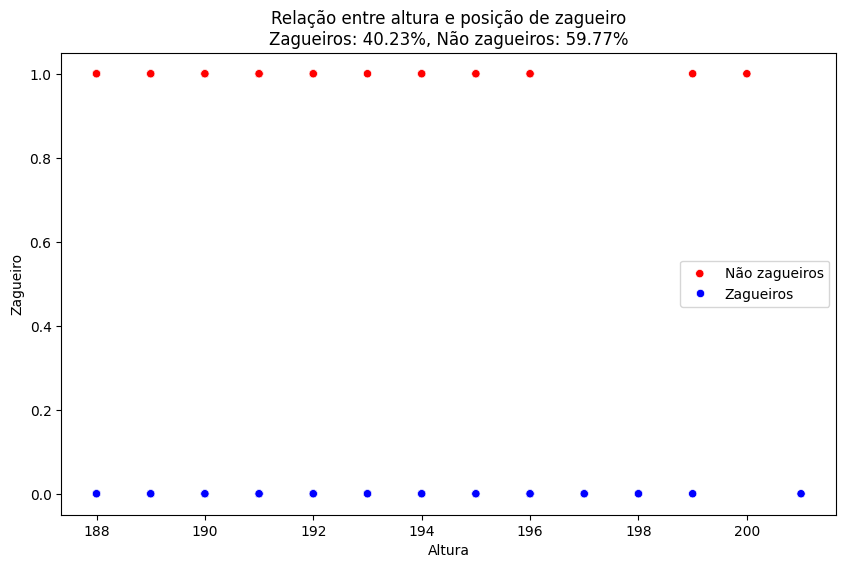

In [ ]:
df['Zagueiro'] = df['Posicao'] == 'DF'

df_filtrado = df[df['Altura'] >= 188]

total = len(df_filtrado)
zagueiros = len(df_filtrado[df_filtrado['Zagueiro']])
nao_zagueiros = total - zagueiros
percent_zagueiros = (zagueiros / total) * 100
percent_nao_zagueiros = (nao_zagueiros / total) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Altura', y='Zagueiro', hue='Zagueiro', palette={False: 'blue', True: 'red'})

plt.xlabel('Altura')
plt.ylabel('Zagueiro')
plt.title(f'Relação entre altura e posição de zagueiro\nZagueiros: {percent_zagueiros:.2f}%, Não zagueiros: {percent_nao_zagueiros:.2f}%')
plt.legend(title='', loc='center right', labels=['Não zagueiros', 'Zagueiros'])
plt.show()

*Surpreendentemente a maioria dos 174 jogadores (59,77%) com mais de 1,88m, nao são zagueiros.*

**Quais os top 10 clubes com mais jogadores na Copa?**

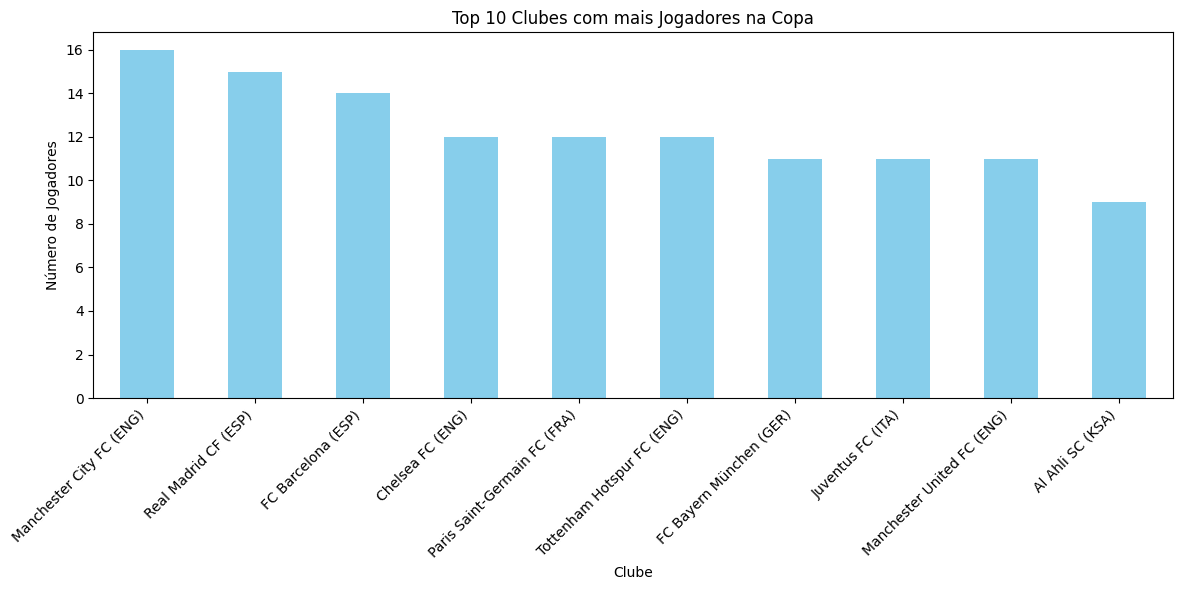

In [ ]:
jogadores_por_clube = df['Clube'].value_counts()

jogadores_por_clube.head(10).plot(kind='bar', figsize=(12, 6), color='skyblue')

plt.title('Top 10 Clubes com mais Jogadores na Copa')
plt.xlabel('Clube')
plt.ylabel('Número de Jogadores')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()